
# PROJET ML Garnier Grenier

Importation des données ELection 2022 2nd tour

In [81]:
# -*- coding: utf-8 -*-
# ESLint-disable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [57]:
# Create a DataFrame from the CSV data
data = pd.read_excel('https://www.data.gouv.fr/fr/datasets/r/06d9816c-1b87-498d-985e-f312acee4f51')

df = data.copy()
df = df.drop(df.columns[[26, 27, 29, 31, 32]], axis=1)
df = df.drop(['Code du département', 'N°Panneau', 'Sexe', 
              'Prénom', '% Abs/Ins', '% Vot/Ins', '% Blancs/Ins', '% Blancs/Vot', '% Nuls/Ins', 
              '% Nuls/Vot', '% Exp/Ins', '% Exp/Vot', '% Voix/Ins'], axis=1,)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,Libellé du département,Code de la commune,Libellé de la commune,Etat saisie,Inscrits,Abstentions,Votants,Blancs,Nuls,Exprimés,Nom,Voix,% Voix/Exp,Unnamed: 28,Unnamed: 30
0,Ain,1,L'Abergement-Clémenciat,Complet,643,146,497,42,5,450,MACRON,237,52.67,LE PEN,213
1,Ain,2,L'Abergement-de-Varey,Complet,213,45,168,23,3,142,MACRON,94,66.20,LE PEN,48
2,Ain,4,Ambérieu-en-Bugey,Complet,8763,2448,6315,461,165,5689,MACRON,3080,54.14,LE PEN,2609
3,Ain,5,Ambérieux-en-Dombes,Complet,1282,266,1016,47,15,954,MACRON,451,47.27,LE PEN,503
4,Ain,6,Ambléon,Complet,103,19,84,12,0,72,MACRON,45,62.50,LE PEN,27


In [58]:
df.var(axis = 0)

/tmp/cache-anagarnier/ipykernel_4078956/1637361517.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var(axis = 0)


Code de la commune    3.327699e+04
Inscrits              8.762086e+07
Abstentions           7.612050e+06
Votants               4.480993e+07
Blancs                1.300221e+05
Nuls                  1.326667e+04
Exprimés              3.883480e+07
Voix                  2.476095e+07
% Voix/Exp            1.314183e+02
Unnamed: 30           2.162080e+06
dtype: float64

In [59]:
X = df[['Inscrits', 'Abstentions', 'Blancs', 'Nuls']]  # variables indépendantes
y = df['Voix']  # variable dépendante

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_score = metrics.r2_score(y_test, y_pred)
scores = cross_val_score(model, X, y, cv=5)

nouvelles_donnees = pd.DataFrame({'Inscrits': [1000], 'Abstentions': [200], 'Blancs': [30], 'Nuls': [10]})
prediction = model.predict(nouvelles_donnees)

# Imprimer les scores de chaque pli
print("Scores de chaque pli : ", scores)

# Imprimer le score moyen
print("Score moyen : ", scores.mean())


Scores de chaque pli :  [0.88342503 0.97169067 0.98158694 0.97228875 0.95713499]
Score moyen :  0.9532252767311278


In [60]:
loyers_appart = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/8fac6fb7-cd07-4747-8e0b-b101c476f0da', encoding='iso-8859-1', sep=';')
loyers_appart.head(10)
loyers_maison = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/cf39b7e5-12fb-48e9-9ee7-b7e5496dcb75', encoding='iso-8859-1', sep=';')

# Convertie les colonnes 'loypredm2' en float
loyers_appart['loypredm2'] = pd.to_numeric(loyers_appart['loypredm2'].str.replace(',', '.'))
loyers_appart['loypredm2'] = pd.to_numeric(loyers_appart['loypredm2'])
loyers_maison['loypredm2'] = pd.to_numeric(loyers_maison['loypredm2'].str.replace(',', '.'))
loyers_maison['loypredm2'] = pd.to_numeric(loyers_maison['loypredm2'])

loyers_appart['upr.IPm2'] = pd.to_numeric(loyers_appart['upr.IPm2'].str.replace(',', '.'))
loyers_maison['upr.IPm2'] = pd.to_numeric(loyers_maison['upr.IPm2'].str.replace(',', '.'))
loyers_appart['upr.IPm2'] = pd.to_numeric(loyers_appart['upr.IPm2'])
loyers_maison['upr.IPm2'] = pd.to_numeric(loyers_maison['upr.IPm2'])

loyers_appart['lwr.IPm2'] = pd.to_numeric(loyers_appart['lwr.IPm2'].str.replace(',', '.'))
loyers_maison['lwr.IPm2'] = pd.to_numeric(loyers_maison['lwr.IPm2'].str.replace(',', '.'))
loyers_appart['lwr.IPm2'] = pd.to_numeric(loyers_appart['lwr.IPm2'])
loyers_maison['lwr.IPm2'] = pd.to_numeric(loyers_maison['lwr.IPm2'])

# Fusionner les deux DataFrames d'origine en un seul DataFrame
loyers = pd.merge(loyers_appart, loyers_maison, on='LIBGEO')

# Calculer la moyenne des loyers prédits pour les appartements et les maisons ligne par ligne
# loyers.head()
loyers['loypredm2_moyen'] = (loyers['loypredm2_x'] + loyers['loypredm2_y']) / 2
loyers['lwr.IPm2'] = (loyers['lwr.IPm2_x'] + loyers['lwr.IPm2_y']) / 2
loyers['upr.IPm2'] = (loyers['upr.IPm2_x'] + loyers['upr.IPm2_y']) / 2

# Créer un nouveau DataFrame avec les colonnes 'LIBGEO' et 'loypredm2_moyen'
loyers_moyen = loyers[['LIBGEO', 'loypredm2_moyen', 'lwr.IPm2', 'upr.IPm2']]

# Afficher les 10 premières lignes du nouveau DataFrame
loyers_moyen.head(10)





,LIBGEO,loypredm2_moyen,lwr.IPm2,upr.IPm2
0,L'Abergement-Clémenciat,8.782018,6.997717,11.022057
1,L'Abergement-de-Varey,8.038375,6.196591,10.428710
2,Ambérieu-en-Bugey,9.242846,7.078619,12.074234
3,Ambérieux-en-Dombes,9.205943,7.135369,11.882300
4,Ambléon,8.512610,6.769867,10.704187
5,Ambronay,8.240217,6.346210,10.700412
6,Ambutrix,8.328916,6.376142,10.883010
7,Andert-et-Condon,8.270202,6.131287,11.161270
8,Anglefort,10.855396,8.398438,14.035091
9,Apremont,8.186342,6.357545,10.544214


In [61]:
df_merged = pd.merge(df, loyers_moyen, left_on='Libellé de la commune', right_on='LIBGEO', how='left')
df_merged = df_merged.drop(['LIBGEO'], axis=1)
df_merged.head()


,Libellé du département,Code de la commune,Libellé de la commune,Etat saisie,Inscrits,Abstentions,Votants,Blancs,Nuls,Exprimés,Nom,Voix,% Voix/Exp,Unnamed: 28,Unnamed: 30,loypredm2_moyen,lwr.IPm2,upr.IPm2
0,Ain,1,L'Abergement-Clémenciat,Complet,643,146,497,42,5,450,MACRON,237,52.67,LE PEN,213,8.782018,6.997717,11.022057
1,Ain,2,L'Abergement-de-Varey,Complet,213,45,168,23,3,142,MACRON,94,66.20,LE PEN,48,8.038375,6.196591,10.428710
2,Ain,4,Ambérieu-en-Bugey,Complet,8763,2448,6315,461,165,5689,MACRON,3080,54.14,LE PEN,2609,9.242846,7.078619,12.074234
3,Ain,5,Ambérieux-en-Dombes,Complet,1282,266,1016,47,15,954,MACRON,451,47.27,LE PEN,503,9.205943,7.135369,11.882300
4,Ain,6,Ambléon,Complet,103,19,84,12,0,72,MACRON,45,62.50,LE PEN,27,8.512610,6.769867,10.704187


In [62]:
df_merged['Majorité_Macron'] = (df_merged['Voix'] > (df_merged['Exprimés'] - df_merged['Blancs'] + df_merged['Nuls']) / 2).astype(int)
# Pas forcément bien traité car si nombre de voix egales, on met que c'est pas la majorité de Le Pen

df_merged_clean = df_merged.dropna(subset=['loypredm2_moyen', 'lwr.IPm2', 'upr.IPm2'])

# Séparer les données en un ensemble d'entraînement et un ensemble de test
X = df_merged_clean[['loypredm2_moyen', 'lwr.IPm2', 'upr.IPm2']]
y = df_merged_clean['Majorité_Macron']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_merged_clean.head()

,Libellé du département,Code de la commune,Libellé de la commune,Etat saisie,Inscrits,Abstentions,Votants,Blancs,Nuls,Exprimés,Nom,Voix,% Voix/Exp,Unnamed: 28,Unnamed: 30,loypredm2_moyen,lwr.IPm2,upr.IPm2,Majorité_Macron
0,Ain,1,L'Abergement-Clémenciat,Complet,643,146,497,42,5,450,MACRON,237,52.67,LE PEN,213,8.782018,6.997717,11.022057,1
1,Ain,2,L'Abergement-de-Varey,Complet,213,45,168,23,3,142,MACRON,94,66.20,LE PEN,48,8.038375,6.196591,10.428710,1
2,Ain,4,Ambérieu-en-Bugey,Complet,8763,2448,6315,461,165,5689,MACRON,3080,54.14,LE PEN,2609,9.242846,7.078619,12.074234,1
3,Ain,5,Ambérieux-en-Dombes,Complet,1282,266,1016,47,15,954,MACRON,451,47.27,LE PEN,503,9.205943,7.135369,11.882300,0
4,Ain,6,Ambléon,Complet,103,19,84,12,0,72,MACRON,45,62.50,LE PEN,27,8.512610,6.769867,10.704187,1


In [63]:
# Entraîner un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Évaluer la précision du modèle sur l'ensemble de test
accuracy = model.score(X_test, y_test)
print('Précision du modèle :', accuracy)

Précision du modèle : 0.5511188033131413


In [64]:
df_communes = pd.read_csv('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/georef-france-commune/exports/csv', sep = ';')

columns_to_keep = ['geo_point_2d', 'geo_shape', 'com_name', 'com_uu2020_status', 'com_in_ctu', 'com_is_mountain_area']
df_communes = df_communes.drop(columns=[col for col in df_communes.columns if col not in columns_to_keep], axis=1)

df_merged2 = pd.merge(df_merged_clean, df_communes, left_on='Libellé de la commune', right_on='com_name', how='left')
df_merged2 = df_merged2.drop(['com_name'], axis=1)

df_merged2[['latitude', 'longitude']] = df_merged2['geo_point_2d'].str.split(', ', expand=True).astype(float)

df_merged2['com_uu2020_status'] = df_merged2['com_uu2020_status'].apply(lambda x: 0 if x == 'hors unité urbaine' else 1)
df_merged2['com_in_ctu'] = df_merged2['com_in_ctu'].apply(lambda x: 0 if x == 'Non' else 1)
df_merged2['com_is_mountain_area'] = df_merged2['com_is_mountain_area'].apply(lambda x: 0 if x == 'Non' else 1)


df_merged2 = df_merged2.drop('geo_point_2d', axis=1)

df_merged2_cleaned = df_merged2.dropna(subset=['latitude', 'longitude', 'geo_shape', 'com_uu2020_status', 'com_in_ctu', 'com_is_mountain_area'])

df_merged2_cleaned.head()

,Libellé du département,Code de la commune,Libellé de la commune,Etat saisie,Inscrits,Abstentions,Votants,Blancs,Nuls,Exprimés,Nom,Voix,% Voix/Exp,Unnamed: 28,Unnamed: 30,loypredm2_moyen,lwr.IPm2,upr.IPm2,Majorité_Macron,geo_shape,com_uu2020_status,com_in_ctu,com_is_mountain_area,latitude,longitude
0,Ain,1,L'Abergement-Clémenciat,Complet,643,146,497,42,5,450,MACRON,237,52.67,LE PEN,213,8.782018,6.997717,11.022057,1,"{""coordinates"": [[[4.95841160881725, 46.153273...",0,0,0,46.153720,4.925852
1,Ain,2,L'Abergement-de-Varey,Complet,213,45,168,23,3,142,MACRON,94,66.20,LE PEN,48,8.038375,6.196591,10.428710,1,"{""coordinates"": [[[5.430202371422386, 45.98277...",0,0,1,46.009605,5.428088
2,Ain,4,Ambérieu-en-Bugey,Complet,8763,2448,6315,461,165,5689,MACRON,3080,54.14,LE PEN,2609,9.242846,7.078619,12.074234,1,"{""coordinates"": [[[5.408819757268224, 45.94206...",1,0,0,45.961049,5.372277
3,Ain,5,Ambérieux-en-Dombes,Complet,1282,266,1016,47,15,954,MACRON,451,47.27,LE PEN,503,9.205943,7.135369,11.882300,0,"{""coordinates"": [[[4.942976529351379, 45.97961...",0,0,0,45.996163,4.911970
4,Ain,6,Ambléon,Complet,103,19,84,12,0,72,MACRON,45,62.50,LE PEN,27,8.512610,6.769867,10.704187,1,"{""coordinates"": [[[5.570825411095892, 45.75338...",0,0,1,45.749886,5.594583


In [75]:
X2 = df_merged2_cleaned[['latitude', 'longitude']]
y2 = df_merged2_cleaned['Majorité_Macron']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

# Entraîner un modèle de régression logistique
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

# Évaluer la précision du modèle sur l'ensemble de test
accuracy2 = model2.score(X_test2, y_test2)
print('Précision du modèle :', accuracy2)

Précision du modèle : 0.5442646507559665


Ici on a une précision d'environ 55%. On va faire une analyse OLS pour comprendre ce résultat.

In [76]:
# Ajouter une colonne de constante au DataFrame X2
X2_with_const = sm.add_constant(X2)

# Créer et entraîner le modèle OLS
model_ols = sm.OLS(y2, X2_with_const).fit()

# Afficher le résumé du modèle
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:        Majorité_Macron   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     22.46
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.76e-10
Time:                        12:58:51   Log-Likelihood:            -2.3102e+05
No. Observations:              320117   AIC:                         4.620e+05
Df Residuals:                  320114   BIC:                         4.621e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5094      0.006     91.485      0.0

In [80]:
nouvelles_donnees2 = pd.DataFrame({'latitude': [43.6100709], 'longitude': [3.8329699]})
prediction2 = model2.predict(nouvelles_donnees2)

resultat = ''

if prediction2[0] == 1:
    resultat = 'Macron'
else:
    resultat = 'Le Pen'

print(resultat)

Macron


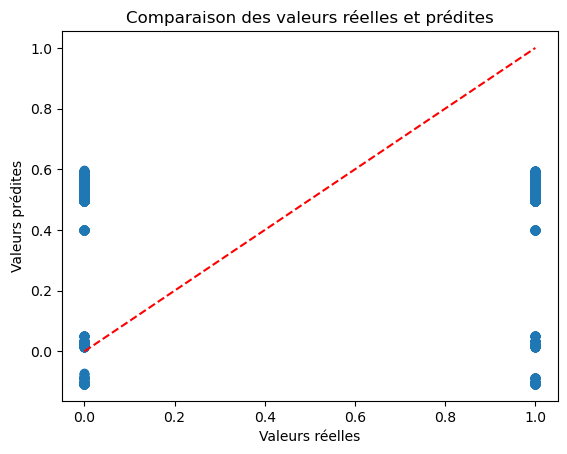

In [84]:
# Importer le module OLS de statsmodels
from statsmodels.regression.linear_model import OLS

# Créer un modèle OLS
model_ols = OLS(y_train2, X_train2)

# Entraîner le modèle OLS
results_ols = model_ols.fit()

# Prédire les valeurs pour l'ensemble de test
y_pred_ols = results_ols.predict(X_test2)

# Tracer le graphique de dispersion
plt.scatter(y_test2, y_pred_ols)

# Tracer la droite d'identité
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], 'r--')

# Ajouter les labels et le titre
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison des valeurs réelles et prédites')

# Afficher le graphique
plt.show()
